In [ ]:
import mne
import sys
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Load the data
from mne_bids import (BIDSPath,read_raw_bids)

# path where to save the datasets.
bids_root = "/Users/jan/Documents/git/ds003846"
subject_id = '02' # recommend subject 30 for now


bids_path = BIDSPath(subject=subject_id, task="PredictionError", session="EMS",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

# read the file
raw = read_raw_bids(bids_path)
raw.info

Extracting parameters from /Users/jan/Documents/git/ds003846/sub-02/ses-EMS/eeg/sub-02_ses-EMS_task-PredictionError_eeg.vhdr...
Setting channel info structure...
Reading events from /Users/jan/Documents/git/ds003846/sub-02/ses-EMS/eeg/sub-02_ses-EMS_task-PredictionError_events.tsv.
Reading channel info from /Users/jan/Documents/git/ds003846/sub-02/ses-EMS/eeg/sub-02_ses-EMS_task-PredictionError_channels.tsv.


/var/folders/bb/xxm_9vsj1w9c1jg8lvn4kll00000gn/T/ipykernel_61359/2848144100.py:14: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 58
block_1: Visual
block_2: Visual + Vibro
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 EOG
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 experimenter: mne_anonymize
 highpass: 0.0 Hz
 line_freq: 50.0
 lowpass: 250.0 Hz
 meas_date: 1800-12-31 04:11:37 UTC
 nchan: 64
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | his_id: sub-02, birthday: 1776-12-30>
>

In [7]:
raw.get_data().shape

(64, 258030)

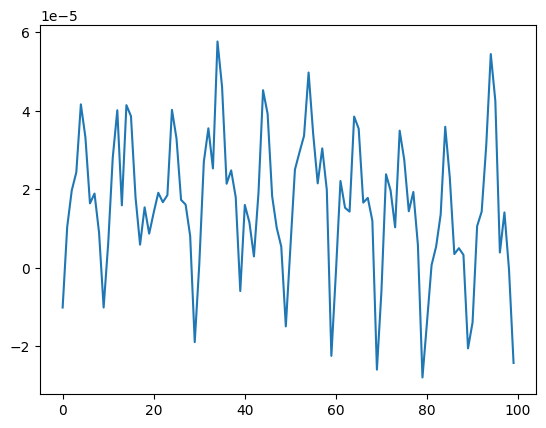

In [16]:
plt.plot(raw[10,:100][0].T)

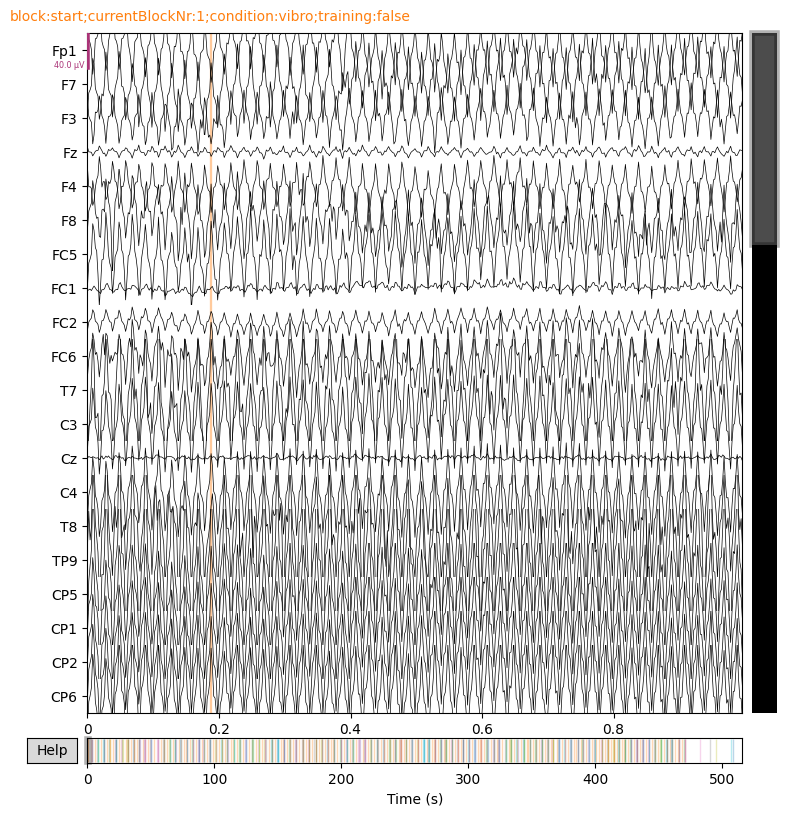

In [15]:
raw.plot(start=0, duration=1);

## Filtering 

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/bb/xxm_9vsj1w9c1jg8lvn4kll00000gn/T/ipykernel_61359/2820817313.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  pz_ch.compute_psd().plot();
/Users/jan/miniforge3/envs/eeg/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


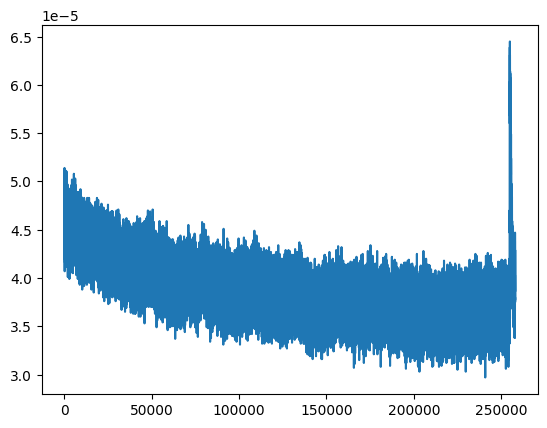

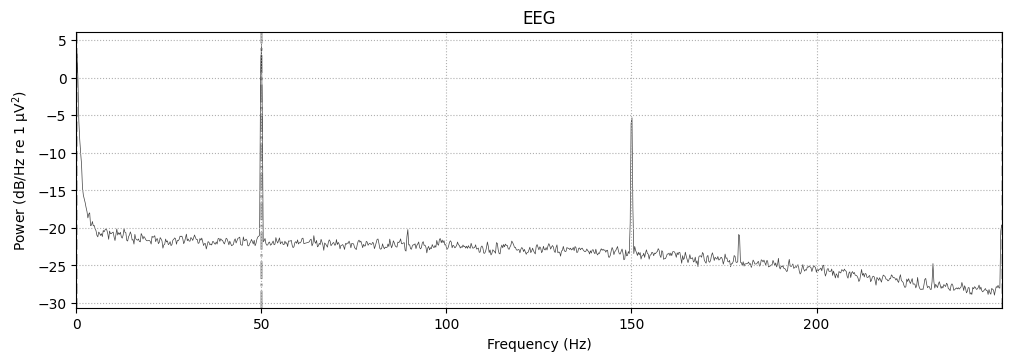

In [18]:
pz_ch = raw.copy().pick(["Cz"])
plt.plot(pz_ch.get_data()[0, :])
pz_ch.compute_psd().plot();

# Remove 50 Hz line noise and also 150 Hz noise

In [26]:
raw_filtered = raw.load_data().copy().notch_filter(freqs=[50, 150])

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)



# Apply a bandpass filter

In [27]:
raw_filtered = raw_filtered.load_data().copy().filter(0.1, 125)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)



Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/bb/xxm_9vsj1w9c1jg8lvn4kll00000gn/T/ipykernel_61359/2250263538.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  pz_ch.compute_psd().plot();
/Users/jan/miniforge3/envs/eeg/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


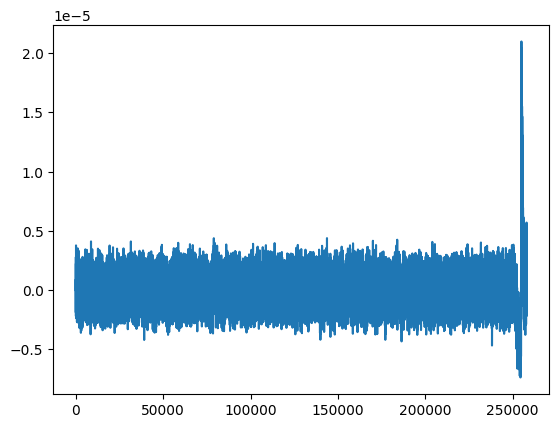

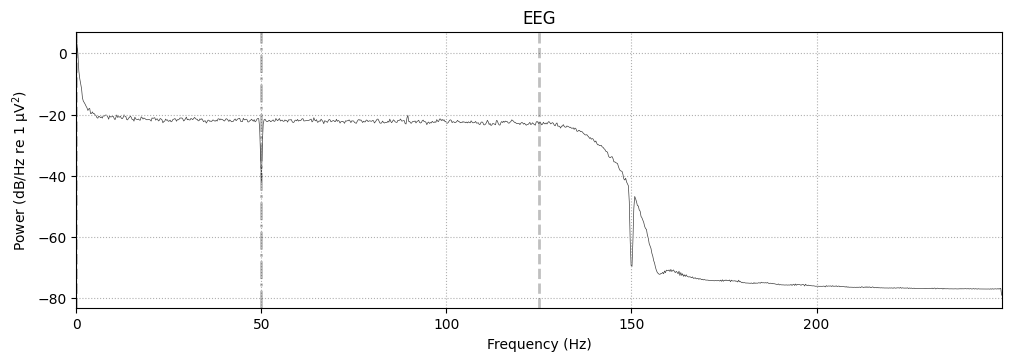

In [28]:
pz_ch = raw_filtered.copy().pick(["Cz"])
plt.plot(pz_ch.get_data()[0, :])
pz_ch.compute_psd().plot();

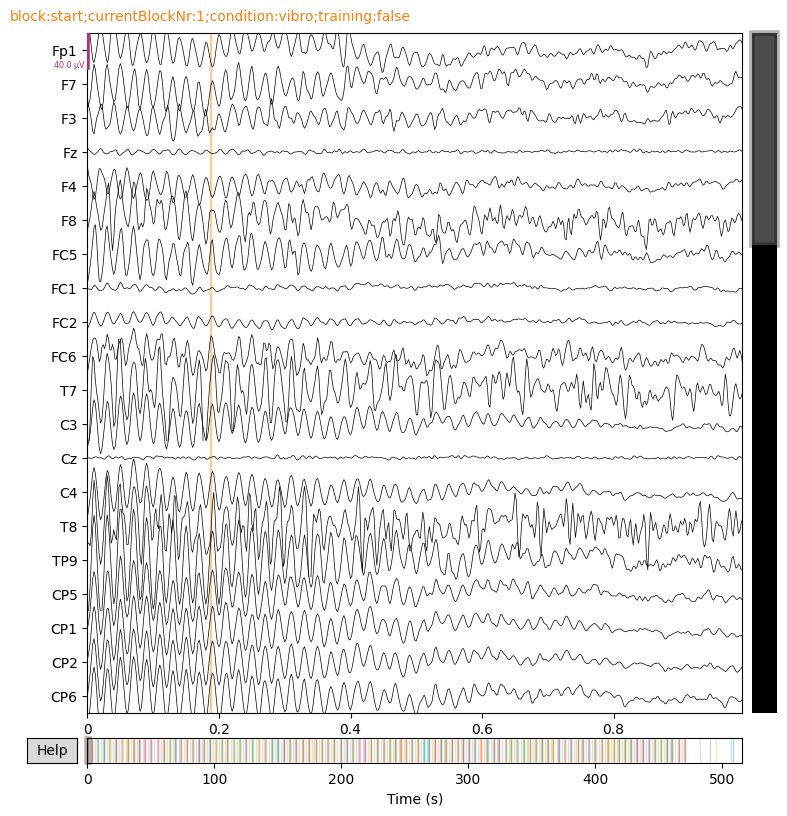

In [32]:
raw_filtered.plot(start=0, duration=1);

# Resample to 250 Hz

In [31]:
raw_filtered_resampled = raw_filtered.copy().resample(250)

# Referencing

In [42]:
raw_filtered_resampled_referenced = raw_filtered_resampled.set_eeg_reference('average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


# Epoching

In [43]:
evts, evts_dict = mne.events_from_annotations(raw)
evts, evts_dict

Used Annotations descriptions: [np.str_('block:end;currentBlockNr:1;condition:vibro;training:false'), np.str_('block:start;currentBlockNr:1;condition:vibro;training:false'), np.str_('box:spawned;condition:vibro;trial_nr:100;normal_or_conflict:conflict;cube:CubeMiddle (UnityEngine.GameObject);isiTime:1.674886'), np.str_('box:spawned;condition:vibro;trial_nr:10;normal_or_conflict:normal;cube:CubeLeft (UnityEngine.GameObject);isiTime:1.224597'), np.str_('box:spawned;condition:vibro;trial_nr:11;normal_or_conflict:conflict;cube:CubeRight (UnityEngine.GameObject);isiTime:1.552389'), np.str_('box:spawned;condition:vibro;trial_nr:12;normal_or_conflict:normal;cube:CubeMiddle (UnityEngine.GameObject);isiTime:1.997462'), np.str_('box:spawned;condition:vibro;trial_nr:13;normal_or_conflict:normal;cube:CubeMiddle (UnityEngine.GameObject);isiTime:1.716086'), np.str_('box:spawned;condition:vibro;trial_nr:14;normal_or_conflict:normal;cube:CubeLeft (UnityEngine.GameObject);isiTime:1.209728'), np.str_('b

(array([[    93,      0,  10002],
        [  1204,      0,  10014],
        [  1678,      0,  10293],
        ...,
        [247779,      0,  10305],
        [253459,      0,  10306],
        [254457,      0,  10001]], shape=(505, 3)),
 {np.str_('block:end;currentBlockNr:1;condition:vibro;training:false'): 10001,
  np.str_('block:start;currentBlockNr:1;condition:vibro;training:false'): 10002,
  np.str_('box:spawned;condition:vibro;trial_nr:100;normal_or_conflict:conflict;cube:CubeMiddle (UnityEngine.GameObject);isiTime:1.674886'): 10003,
  np.str_('box:spawned;condition:vibro;trial_nr:10;normal_or_conflict:normal;cube:CubeLeft (UnityEngine.GameObject);isiTime:1.224597'): 10004,
  np.str_('box:spawned;condition:vibro;trial_nr:11;normal_or_conflict:conflict;cube:CubeRight (UnityEngine.GameObject);isiTime:1.552389'): 10005,
  np.str_('box:spawned;condition:vibro;trial_nr:12;normal_or_conflict:normal;cube:CubeMiddle (UnityEngine.GameObject);isiTime:1.997462'): 10006,
  np.str_('box:spawned;

Not setting metadata
150 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 150 events and 276 original time points ...
68 bad epochs dropped
Need more than one channel to make topography for eeg. Disabling interactivity.


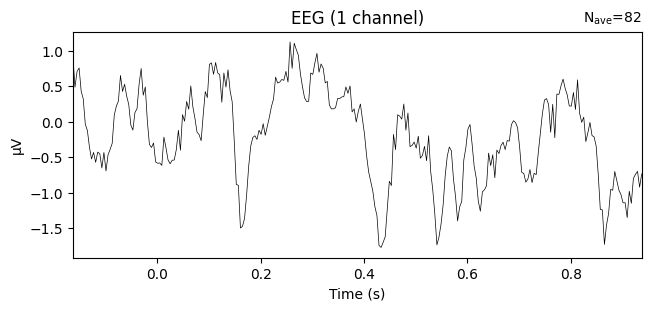

In [56]:
wanted_keys = [e for e in evts_dict.keys() if "normal_or_conflict:normal" in e and "box:touched" in e]
evts_dict_stim = dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)
evts_dict_stim
epochs = mne.Epochs(raw_filtered_resampled_referenced, evts, evts_dict_stim, tmin=-0.1, tmax=1)
epochs = epochs.load_data().shift_time(-0.063)
epochs.average().copy().pick(['Cz']).plot();

Not setting metadata
50 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 50 events and 276 original time points ...
24 bad epochs dropped
Need more than one channel to make topography for eeg. Disabling interactivity.


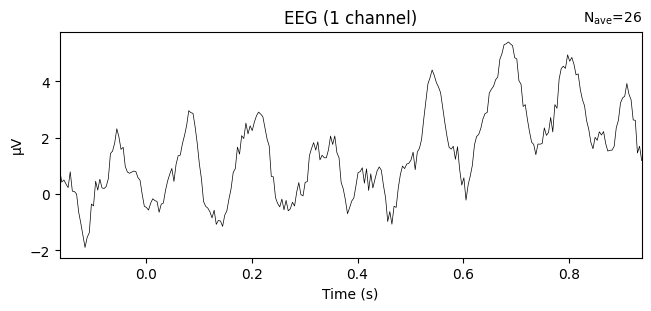

In [57]:
wanted_keys = [e for e in evts_dict.keys() if "normal_or_conflict:conflict" in e and "box:touched" in e]
evts_dict_stim = dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)
epochs = mne.Epochs(raw_filtered_resampled_referenced, evts, evts_dict_stim, tmin=-0.1, tmax=1)
epochs = epochs.load_data().shift_time(-0.063)
epochs.average().copy().pick(['Cz']).plot();